# FIFA World Cup 2022


## Introduction

After two years through the COVID-19 pandemic, the world has once again been shaken by one of the world's most biggest sport tournament, FIFA World Cup. FIFA World Cup is a professional football tournament that gathers 32 strongest national football teams from all over the globe. The championship went to Lionel Messi and his teammates. Argentina played against France after 120 minutes, and the game only ended after a penalty shoot-out. Their performance has convinced both fans and non-fans with their magical footwork that is usually described as 'tango dancer'. However, let take into consideration of other insights to evaluate whether Argentina is worthy of their medal. <br>

The dataset is found on [Kaggle](https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-statistics?select=team_data.csv) that collects 189 different statistics about football.

## EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

We first load the data and name it `team`

In [78]:
team = pd.read_csv('data/team_data.csv')


In [5]:
team.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,63,74,8,1,0,0,271,43,56,43.4
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,32,38,2,0,0,0,142,42,36,53.8


The next step is to check if there is any `null` values in the dataset.

In [6]:
team.isnull().sum().all()

False

Since there is no `null` values, we proceeded with the an overview of the offensive capability of all teams, number of goals per on-target shots. Along with defense system, the ability to score is the main factor that contributes to the victory of a team. It is also important to convert opportunities into goals when given. A strong team is the team that can instantly punish their opponent when they commit mistakes with a goal. The higher the ratio, the better the team converts their opportunities.

In [7]:
team['goals/shots_on_target'] = team['goals_per90'].div(team['shots_on_target_per90'])
team.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,goals/shots_on_target
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,115,23,5,2,1,357,83,90,48.0,0.366355
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,34,1,0,0,0,200,72,72,50.0,0.375000
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,35,3,0,1,0,132,33,28,54.1,0.110000
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,74,8,1,0,0,271,43,56,43.4,0.200000
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,38,2,0,0,0,142,42,36,53.8,0.249531


Looking at the graph, we notice that Netherlands landed at the first place with an amazing goal conversion rate of 0.62. It is quite impressive because Netherlands left the tournament at the quarter-final. However, the champion, Argentina, has a goal per shot on target ratio of 0.37. It seemed like they had a hard time finding the goal of their opponents.

Text(0.5, 0, 'goals/shots_on_targer')

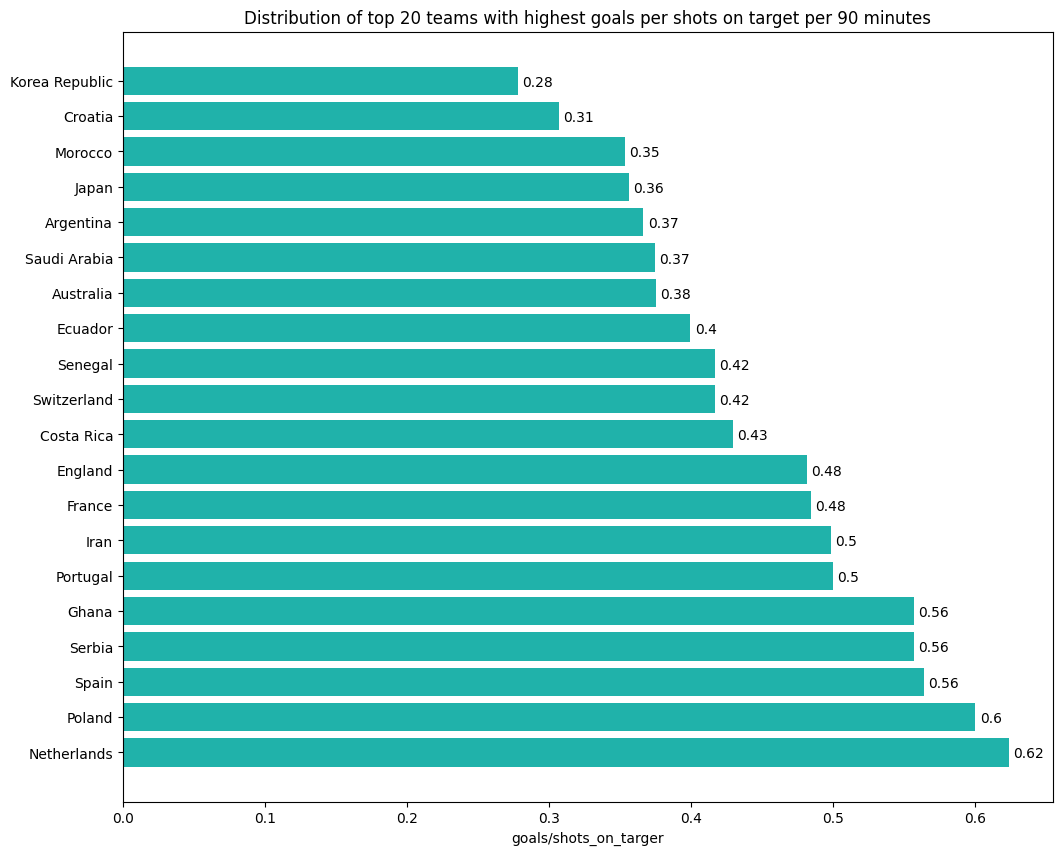

In [77]:
fig,ax = plt.subplots(figsize=(12,10))
ax = plt.barh(y='team',width='goals/shots_on_target',data = team.sort_values('goals/shots_on_target',ascending=False).head(20),color = 'lightseagreen')
for i in ax.patches:
    plt.text(i.get_width()+ 0.003, i.get_y()+0.25,
             str(round((i.get_width()), 2)),
             fontsize=10,
             color='black')
plt.title('Distribution of top 20 teams with highest goals per shots on target per 90 minutes')
plt.xlabel('goals/shots_on_targer')


Another important statistics that most professionals seek for is `Expected Goals(xG)`. Expected Goals is the........

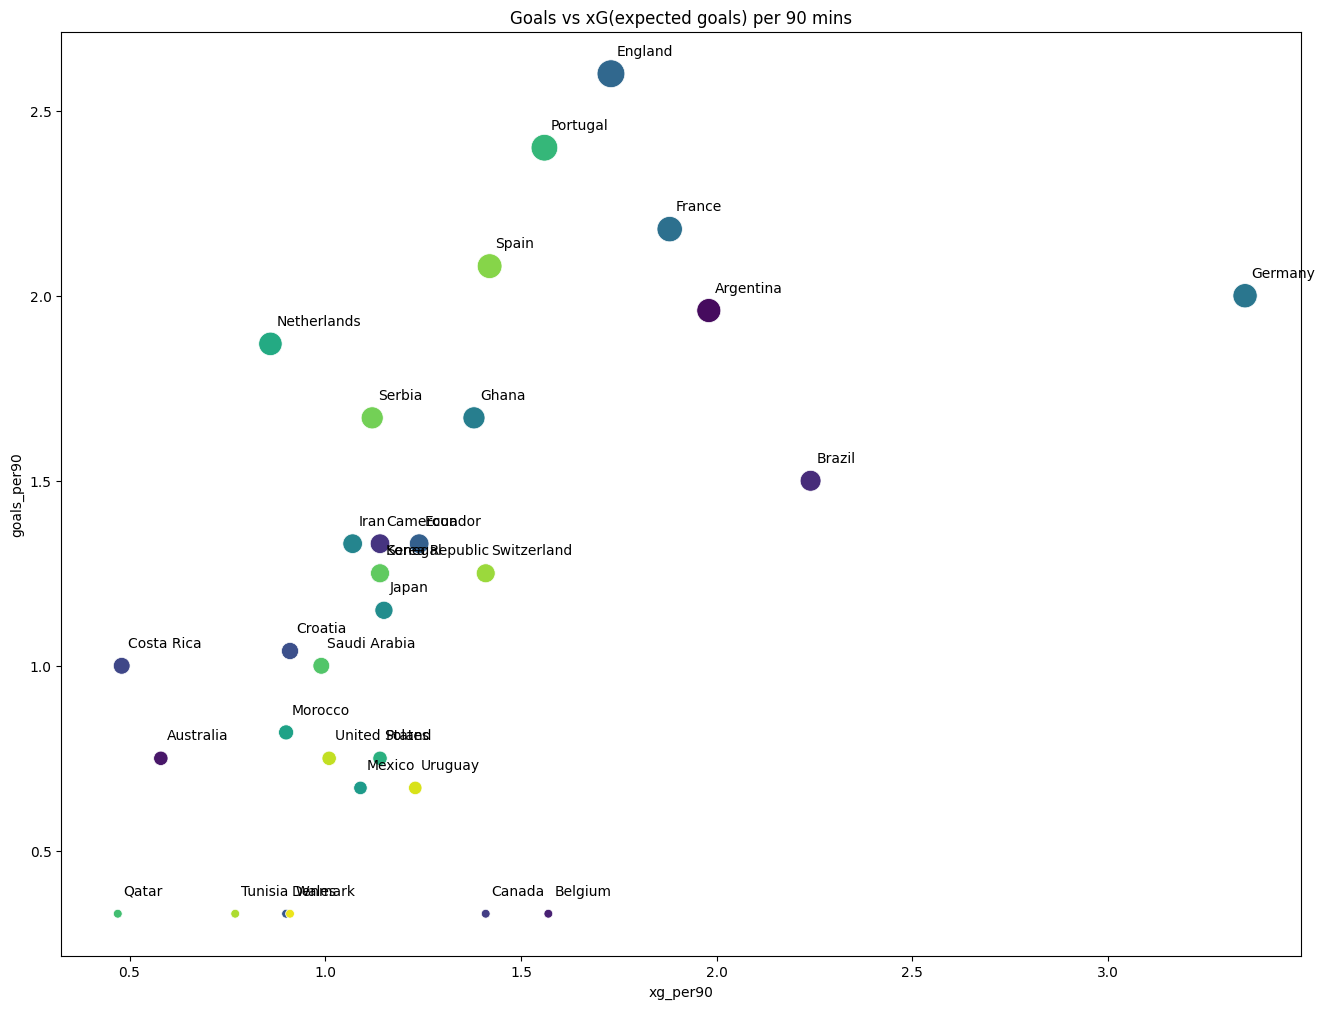

In [79]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=team,y='goals_per90',x='xg_per90',hue='team',size='goals_per90',palette = 'viridis',sizes = (40,400))
for i in range(team.shape[0]):
 plt.text(x=team['xg_per90'][i]+0.015,y=team['goals_per90'][i]+0.05,s=team.team[i], 
          fontdict=dict(color='black',size=10))
plt.title('Goals vs xG(expected goals) per 90 mins')
plt.legend([],[], frameon=False)

Text(0.5, 1.0, 'Number of players used')

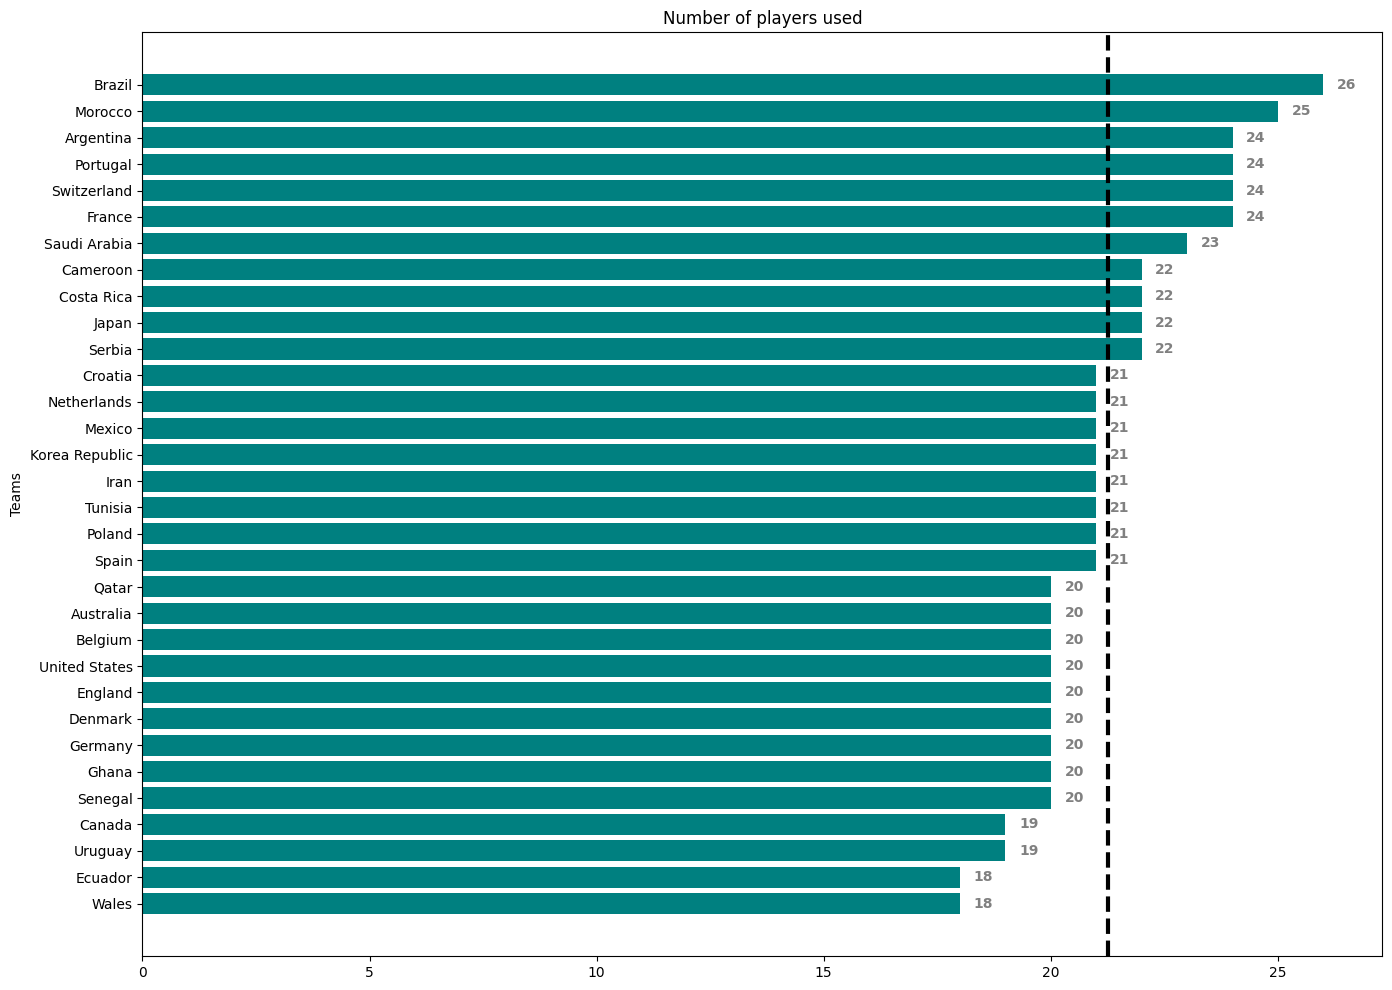

In [10]:
fig, ax = plt.subplots(figsize=(16,12))
ax.barh('team',width = 'players_used',data = team.sort_values('players_used',ascending=True),color = 'teal')
for i in ax.patches:
    plt.text(i.get_width()+0.3, i.get_y()+0.25,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
avg_players_used = np.mean(team['players_used'])
ax.axvline(x=avg_players_used,linestyle='--',color='black',linewidth = 3)
ax.set_ylabel('Teams')
ax.set_title('Number of players used')

## Fair Play


Text(0.5, 0, 'Team')

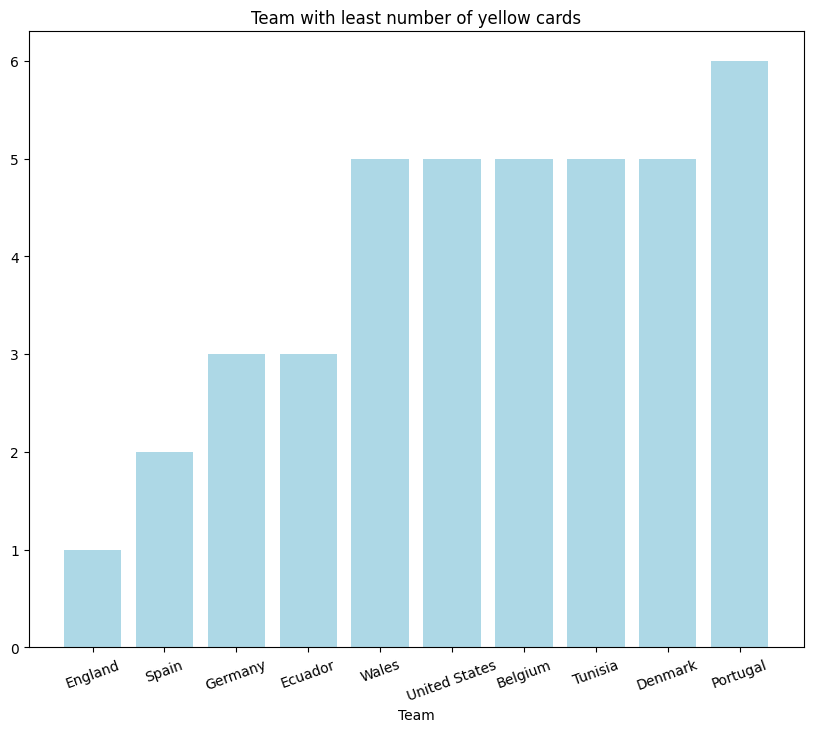

In [11]:
plt.figure(figsize=(10,8))
plt.bar(x='team',height='cards_yellow',data=team.sort_values('cards_yellow',ascending=True).head(10),color='lightblue')
plt.xticks(rotation = 20)
plt.title('Team with least number of yellow cards')
plt.xlabel('Team')

## Passes Allowed per Defensive Action (PPDA)

Source: [Defensive metric](https://statsbomb.com/articles/soccer/defensive-metrics-measuring-the-intensity-of-a-high-press) <br>
 __PPDA = Number of Passes (opponent)/Number of Defensive Actions__ <br>
Based on Colin Trainor, Defensive Actions consist of: <br>
- Tackles <br>
- Interceptions <br>
- Failed tackled <br>
- Fouls <br>
A smaller PPDA ratio indicates a higher defensive intensity 

Text(0.5, 1.0, 'Distribution of PPDA among teams')

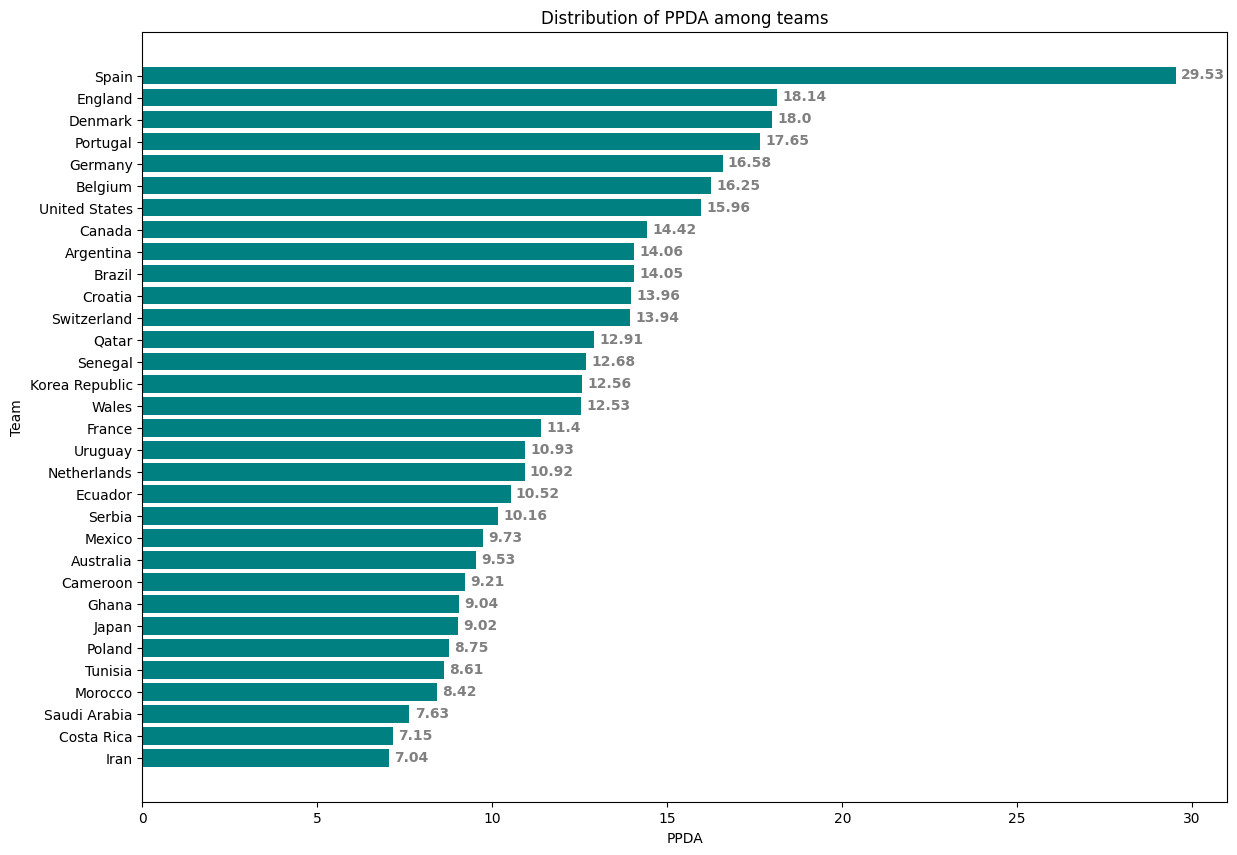

In [32]:
team['def_actions'] = team['tackles'] + team['interceptions'] + team['tackles'].subtract(team['tackles_won']) + team['fouls']
team['ppda'] = round(team['passes'].div(team['def_actions']),2)

fig, ax = plt.subplots(figsize=(14,10))
ax.barh('team',width = 'ppda',data = team.sort_values('ppda',ascending=True),color = 'teal')
for i in ax.patches:
    plt.text(i.get_width()+0.15, i.get_y()+0.25,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
#avg_players_used = np.mean(team['players_used'])
#ax.axvline(x=avg_players_used,linestyle='--',color='black',linewidth = 3)
ax.set_ylabel('Team')
ax.set_xlabel('PPDA')
ax.set_title('Distribution of PPDA among teams')


Spain yielded the highest ball possession (75.8 minutes) but only scored slightly above mean goals of all teams. <br>
France possessed the ball for average 51.3 minutes but scored surprisingly high number of goals, 16. 

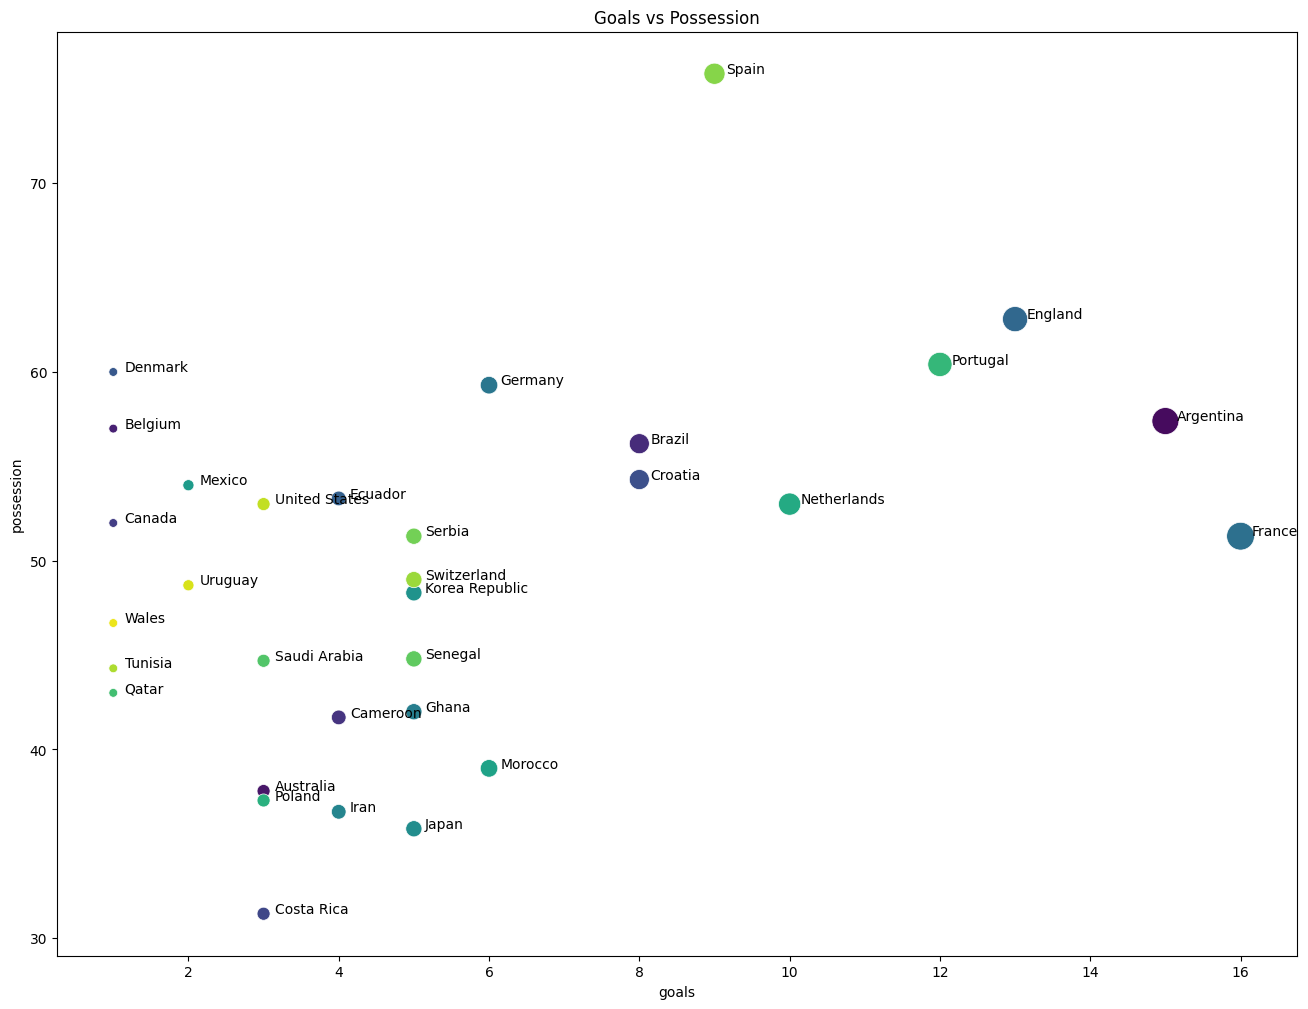

In [13]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=team,y='possession',x='goals',hue='team',size='goals',palette = 'viridis',sizes = (40,400))
for i in range(team.shape[0]):
 plt.text(x=team['goals'][i]+0.15,y=team['possession'][i]+0.025,s=team.team[i], 
          fontdict=dict(color='black',size=10))
plt.title('Goals vs Possession')

np.mean( team['goals'])
plt.legend([],[], frameon=False)

In [14]:
import plotly.express as px
fig = px.treemap(team, path = ['team'], values = 'possession',color_continuous_scale=' twilight',
                  color_continuous_midpoint=np.average(team['possession'], weights=team['possession']),title = 'Average ball possession among teams')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show()

In [15]:
team.loc[:,['games','passes_completed']].head()


,games,passes_completed
0,7,3911
1,4,1254
2,3,1598
3,5,2750
4,3,960


In [16]:
team['passes_completed_per_game'] = round(team['passes_completed'].div(team['games']))
team.loc[:,['team','passes_completed_per_game',]].head(20)

,team,passes_completed_per_game
0,Argentina,559.0
1,Australia,314.0
2,Belgium,533.0
3,Brazil,550.0
4,Cameroon,320.0
5,Canada,436.0
6,Costa Rica,274.0
7,Croatia,538.0
8,Denmark,533.0
9,Ecuador,384.0


Text(9.444444444444452, 0.5, 'Passes into final third zone')

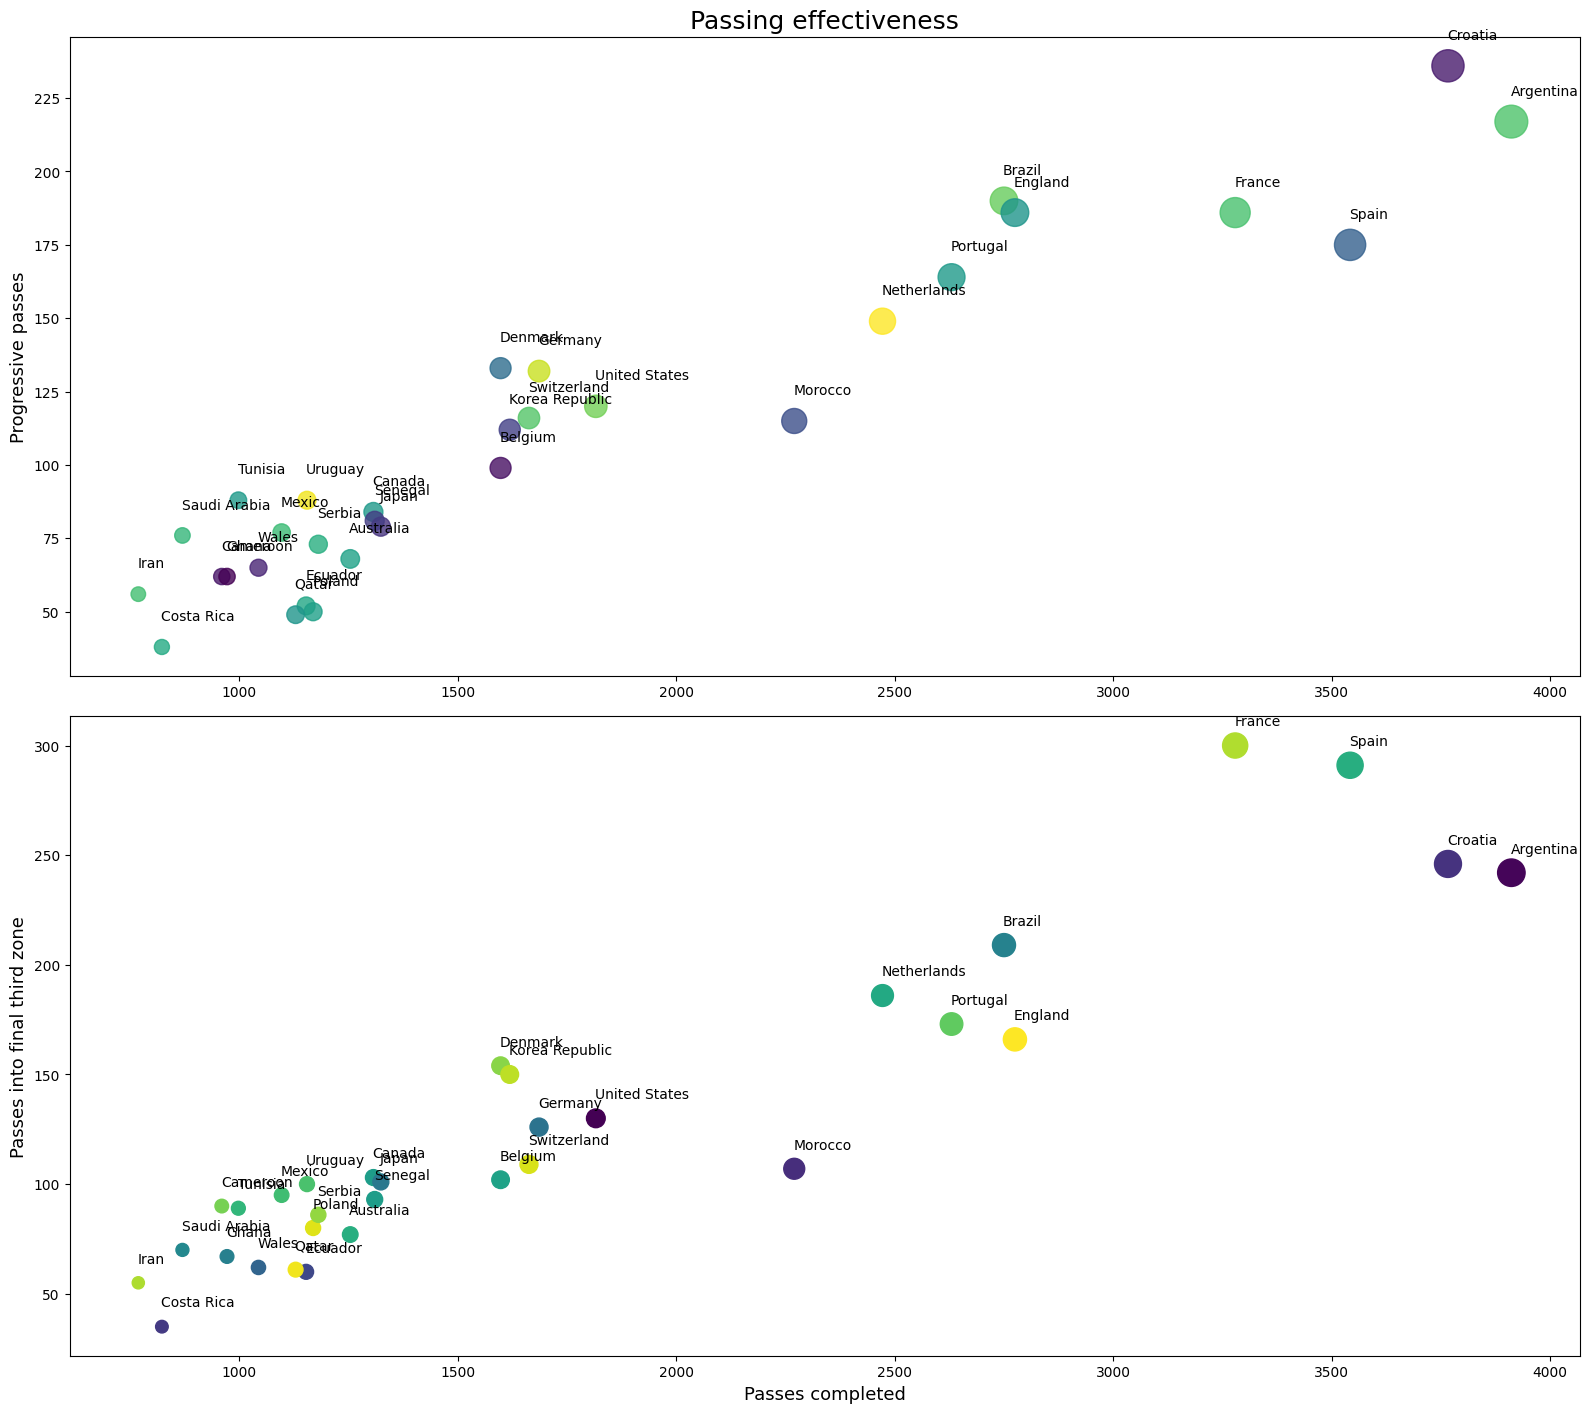

In [17]:
fig,axes = plt.subplots(2,1,figsize=(16,14))
axes[0].set_title('Passing effectiveness',size = 18)

axes[0].scatter(data=team,y='progressive_passes',x='passes_completed',s=team['passes_completed'].div(7),c = np.random.rand(team.shape[0]),alpha=0.8)
for i in range(team.shape[0]):
 axes[0].text(x=team['passes_completed'][i]-2,y=team['progressive_passes'][i]+9,s=team.team[i], 
          fontdict=dict(color='black',size=10))
plt.tight_layout()
axes[0].set_ylabel('Progressive passes',size =13)

axes[1].scatter(data=team,y='passes_into_final_third',x='passes_completed',s=team['passes_completed'].div(10),c = np.random.rand(team.shape[0]))
for i in range(team.shape[0]):
 axes[1].text(x=team['passes_completed'][i]-2,y=team['passes_into_final_third'][i]+9,s=team.team[i], 
          fontdict=dict(color='black',size=10))
plt.tight_layout()
axes[1].set_xlabel('Passes completed',size =13)
axes[1].set_ylabel('Passes into final third zone',size =13)


England stood out for high conversion rate(highest goals per 90 with fairly high number of shots to the goal)
Germany created the most chances toward the opponents' goal but can not converse them into scores (2 goals for every 8 shots toward the goal).

Text(0.5, 9.444444444444459, 'Shot creating actions per 90')

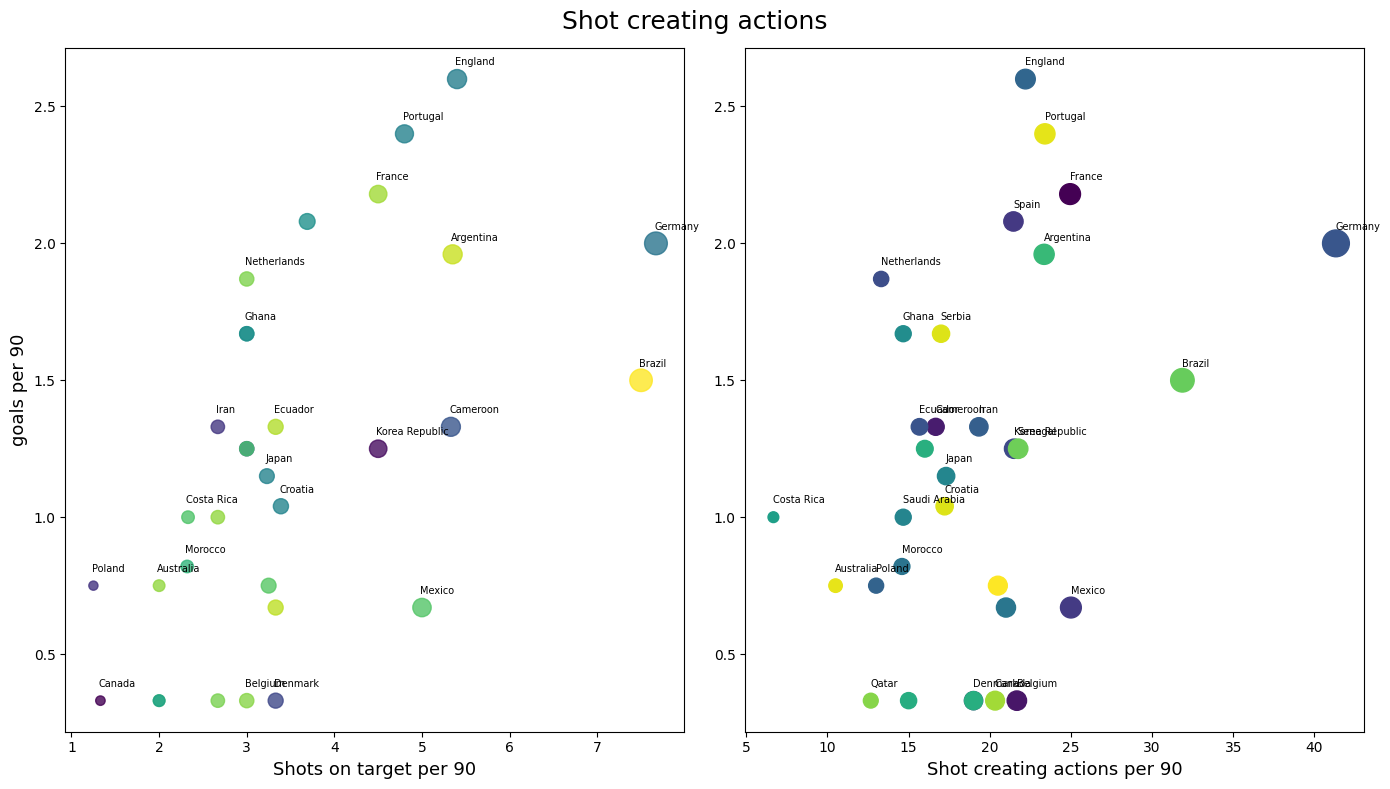

In [18]:
fig,axes = plt.subplots(1,2,figsize=(14,8))
fig.suptitle('Shot creating actions',size = 18)

axes[0].scatter(data=team,y='goals_per90',x='shots_on_target_per90',s=team['shots_on_target_per90']*35,c = np.random.rand(team.shape[0]),alpha=0.8)
for i in range(team.shape[0] - 10):
 axes[0].text(x=team['shots_on_target_per90'][i]-0.02,y=team['goals_per90'][i]+0.05,s=team.team[i], 
          fontdict=dict(color='black',size=7))
plt.tight_layout()
axes[0].set_ylabel('goals per 90',size =13)
axes[0].set_xlabel('Shots on target per 90',size =13)

axes[1].scatter(data=team,y='goals_per90',x='sca_per90',s=team['sca_per90']*9,c = np.random.rand(team.shape[0]))
for i in range(team.shape[0]-5):
 axes[1].text(x=team['sca_per90'][i]-0.02,y=team['goals_per90'][i]+0.05,s=team.team[i], 
          fontdict=dict(color='black',size=7))
plt.tight_layout()
axes[1].set_xlabel('Shot creating actions per 90',size =13)


PSxG (Post Shot expected Goals):  measure of the quality of a shot excluding external factors of the game. The higher PSxG of a shot, the more likely the goalkeeper can not stop it. In other words, PSxG can also be used to assess a goalkeeper's ability to make a save. The metric we will use here is the difference between the goals conceded and the PSxG of the shots goalkeepers faced. Conceding fewer goals than they are expected to indicates an above average performance. 

In [19]:
team['shot-stopping_ability'] = team['gk_psxg'] - team['on_goals_against']
team['shot-stopping_ability']


0    -2.6
1    -0.5
2     2.1
3     0.1
4     0.9
5    -1.6
6    -1.4
7     3.5
8     0.7
9    -0.9
10   -1.5
11    1.3
12    0.1
13   -0.5
14   -1.5
15    1.3
16   -1.4
17    0.0
18   -1.1
19    2.5
20    2.8
21    0.0
22   -2.7
23    1.8
24   -1.6
25   -0.3
26    0.7
27   -0.4
28    1.4
29   -0.6
30    1.0
31   -1.1
Name: shot-stopping_ability, dtype: float64

In [20]:
team[team['team'] == 'Argentina']['shot-stopping_ability']

0   -2.6
Name: shot-stopping_ability, dtype: float64

Croatia's goalkeeper has done exceptionally well in defending against oppenents' shots with the difference in post shot expected goals and conceded goals of 3.5. The World Cup 2022 runner-up, France, also show a stable yet effectice defending performance with the shot stopping ability of 1.3, whereas, their rival, Argentina, ranked second last with -2.6. However, the goalkeeper of Argentina played a crucial part in the penalty shoot-out and led the team to the championship.

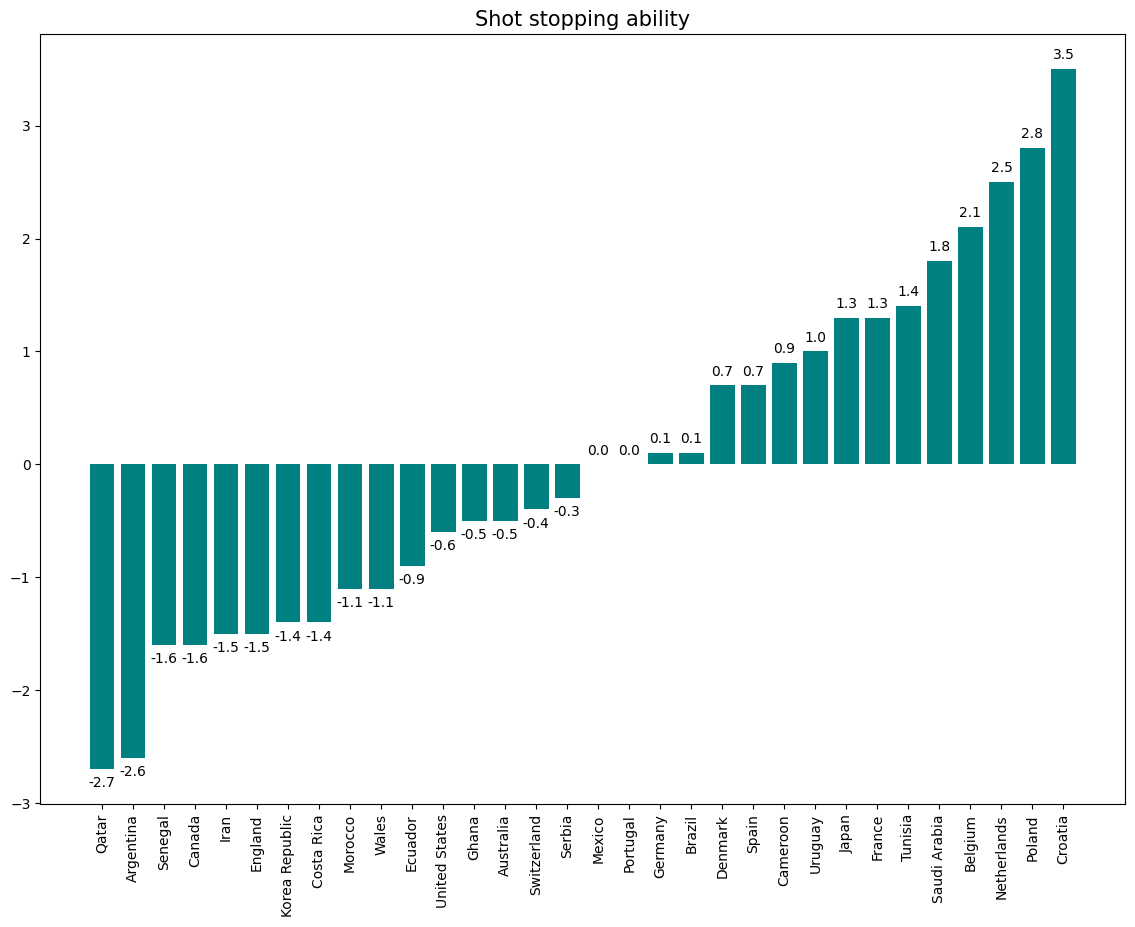

In [59]:


fig, ax = plt.subplots(figsize=(14,10))

ax = plt.bar(data=team.sort_values('shot-stopping_ability'),height='shot-stopping_ability',x='team',color='teal')
#for i in range(len(team['shot-stopping_ability'])):
#    plt.annotate(str(round(team['shot-stopping_ability'][i],2)), xy = (team['team'][i],team['shot-stopping_ability'][i]),ha='center', va='bottom')

plt.xticks(rotation = 90)
plt.title('Shot stopping ability',loc = 'center',size = 15)

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
add_value_labels(ax)




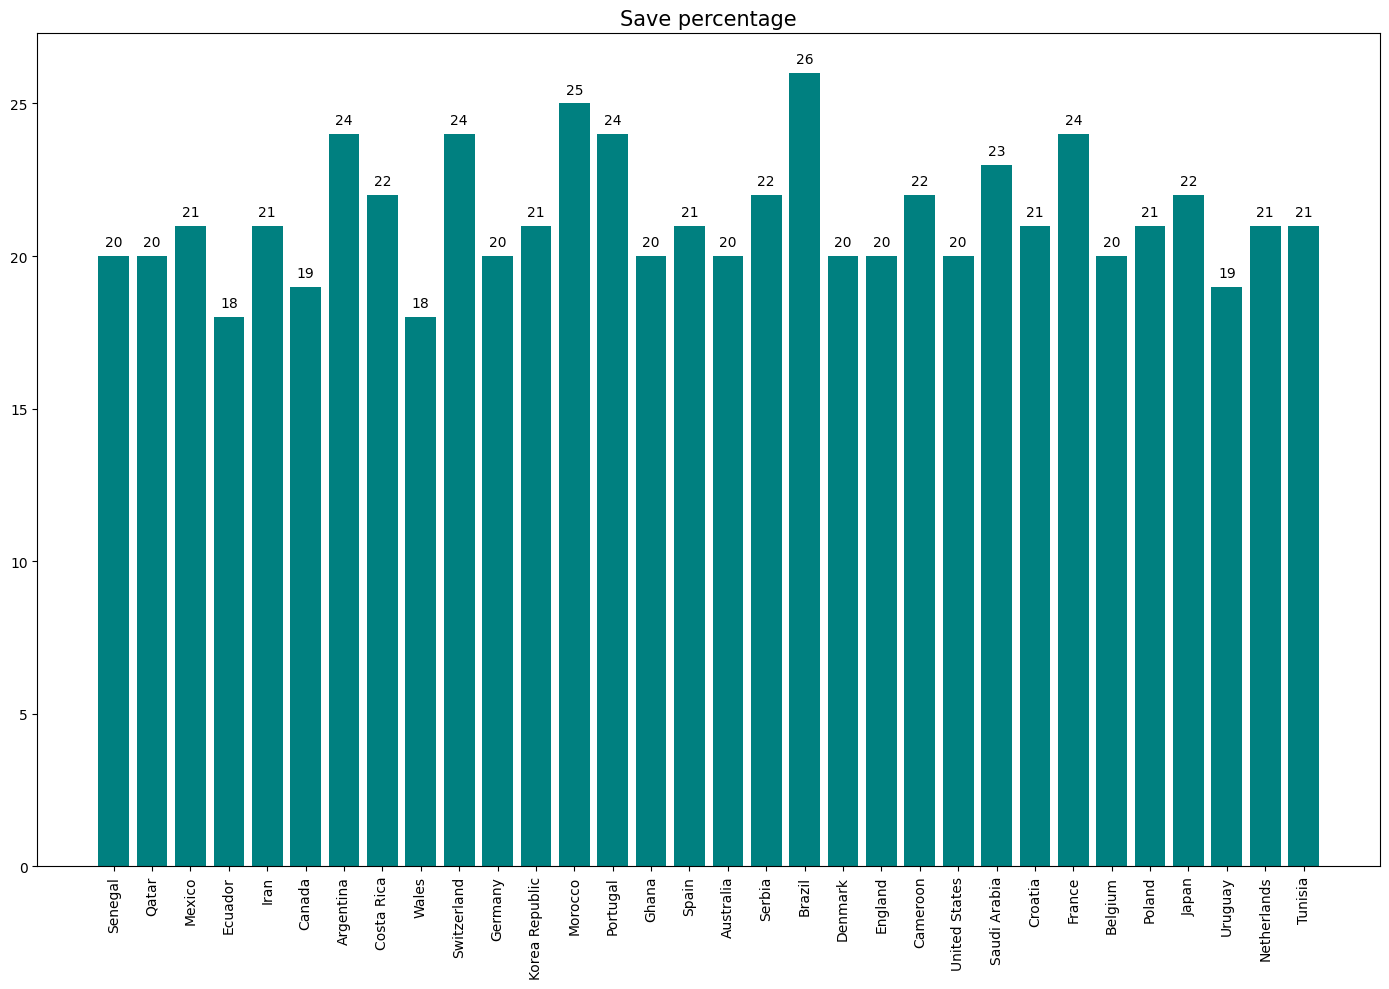

In [65]:
fig, ax = plt.subplots(figsize=(14,10))

#barplot = sns.barplot(data=team.sort_values('gk_save_pct'),y='gk_save_pct',x='team',hue='team',width=13,palette='viridis')
#.set_xticklabels(barplot.get_xticklabels(), rotation = 90)

ax = plt.bar('team',height = 'players_used',data = team.sort_values('gk_save_pct'),color = 'teal')
plt.xticks(rotation = 90)
plt.title('Save percentage',loc = 'center',size = 15)
plt.tight_layout()
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = y_value

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
add_value_labels(ax)
